## Afordable Housing Projects in LA Exploration
The purpose of this assignment is to explore various aspects of the HCIDLA dataset and particularly examine what communities affordable housing projects are located / being developed in, what types of housing projects are most common, and the stages they are at (particularly the projects in the ‘development stage’, as this gives insight into the current state and direction of affordable housing projects and where they are headed). The goal is to find insights or trends 
 

import libraries

In [27]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

import the data

In [28]:
Housing = gpd.read_file('HCIDLA Affordable Housing Projects List (2003 to Present).geojson')

Learn about the data 

In [29]:
Housing.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   site_units                 503 non-null    object  
 1   tax_exempt_conduit_bond    503 non-null    object  
 2   community                  502 non-null    object  
 3   contract_url               346 non-null    object  
 4   development_stage          503 non-null    object  
 5   name                       503 non-null    object  
 6   location                   503 non-null    object  
 7   leverage                   503 non-null    object  
 8   latitude                   503 non-null    object  
 9   photo                      503 non-null    object  
 10  contract_number_hyperlink  346 non-null    object  
 11  project_number             503 non-null    object  
 12  developer                  503 non-null    object  
 13  date_stamp                 

In [30]:
Housing.head()

,site_units,tax_exempt_conduit_bond,community,contract_url,development_stage,name,location,leverage,latitude,photo,...,contract_numbers,address,apn,project_total_units,housing_type,management_company,supportive_housing,council_district,tdc,geometry
0,0,10247566,CENTRAL,None,In-Service,LEXINGTON APARTMENTS A/B (SITE 11),0xE6100000010C3B3602F1BA024140F5A10BEA5B905DC0,6771719,34.02133,click here (http://hcidapp.lacity.org/mpphotos...,...,None,"1145 E 24TH ST Los Angeles, CA 90011",5131020009,251,FAMILY,"ALPHA PROPERTY MANAGEMENT, INC.",No,9,17019285,POINT (-118.25561 34.02133)
1,8,4641342,CENTURY PALMS/COVE,None,In-Service,WINDWARD APTS (A/B) (SITE 14),0xE6100000010C4E0B5EF415F8404069A9BC1DE1905DC0,7438473,33.93817,click here (http://hcidapp.lacity.org/mpphotos...,...,None,"636 E 108TH ST 1-4 Los Angeles, CA 90059",6071001013,232,FAMILY,"ALPHA PROPERTY MANAGEMENT, INC.",No,8,12079815,POINT (-118.26374 33.93817)
2,16,0,HOLLYWOOD,https://hcidapp.lacity.org/citycontractref/def...,In-Service,BRICKER,0xE6100000010C7008556AF60C4140A774B0FECF935DC0,6465419,34.10127,click here (http://hcidapp.lacity.org/mpphotos...,...,C-111304 (https://hcidapp.lacity.org/citycontr...,"1671 N WESTERN AVE Los Angeles, CA 90028",5544025033,16,SENIORS,BARKER MANAGEMENT INCORPORATED,No,13,7093297,POINT (-118.30957 34.10127)
3,20,6787000,UNIVERSITY PARK,None,In-Service,HDR I & II (SITE 4),0xE6100000010C959A3DD00A044140AE0D15E3FC915DC0,8116043,34.03158,click here (http://hcidapp.lacity.org/mpphotos...,...,None,"2375 S SCARFF ST Los Angeles, CA 90007",5124011008,125,FAMILY,PK MANAGEMENT,No,1,14903043,POINT (-118.28106 34.03158)
4,16,0,KOREATOWN,https://hcidapp.lacity.org/citycontractref/def...,In-Service,ALEXANDRIA HOUSE APTS.,0xE6100000010C8E23D6E253084140931804560E935DC0,5928306,34.06506,click here (http://hcidapp.lacity.org/mpphotos...,...,C-114811 (https://hcidapp.lacity.org/citycontr...,"510 S ALEXANDRIA AVE 1-20 Los Angeles, CA 90020",5502020005,16,SPECIAL NEEDS,BARKER MANAGEMENT INC.,Yes,10,6728306,POINT (-118.29775 34.06506)


Keep relevant columns only

In [31]:
# list only columns to keep
columns_to_keep = ['community', 'development_stage', 'project_total_units', 'date_funded', 'housing_type', 'address','geometry']
Housing_filtered = Housing[columns_to_keep]
Housing_filtered.sample(10)


,community,development_stage,project_total_units,date_funded,housing_type,address,geometry
382,KOREATOWN,In-Service,66,2011-04-08T00:00:00,FAMILY,"540 S NORMANDIE AVE 1-66 Los Angeles, CA 90020",POINT (-118.30015 34.06411)
133,SOUTH PARK,In-Service,19,2013-03-06T00:00:00,SPECIAL NEEDS,"5216 S FIGUEROA ST Los Angeles, CA 90037",POINT (-118.28247 33.99536)
44,HOLLYWOOD HILLS,In-Service,68,2015-12-29T00:00:00,FAMILY,"1924 N ARGYLE AVE Los Angeles, CA 90068",POINT (-118.32509 34.10601)
18,TEMPLE-BEAUDRY,In-Service,49,2006-01-19T00:00:00,FAMILY,"116 S WITMER ST Los Angeles, CA 90026",POINT (-118.26086 34.06173)
200,WESTLAKE,In-Service,53,2008-12-02T00:00:00,FAMILY,"501 S BONNIE BRAE ST Los Angeles, CA 90057",POINT (-118.27229 34.05924)
146,ELYSIAN VALLEY,In-Service,125,2007-07-01T00:00:00,FAMILY,"2747 N NEWELL ST Los Angeles, CA 90039",POINT (-118.24507 34.10088)
441,DOWNTOWN,In-Service,97,2008-02-15T00:00:00,SPECIAL NEEDS,"1624 S HOPE ST 1-97 Los Angeles, CA 90015",POINT (-118.26787 34.03576)
359,WELLINGTON SQUARE,In-Service,60,2007-10-26T00:00:00,SENIORS,"2440 S CRENSHAW BLVD Torrance, CA 90018",POINT (-118.33306 34.03429)
371,EXPOSITION,In-Service,64,2017-11-27T00:00:00,SPECIAL NEEDS,"3023 1/2 S WEST VIEW ST LOS ANGELES, CA 90016",POINT (-118.35340 34.02623)
331,WEST VERNON,In-Service,61,2017-05-31T00:00:00,FAMILY,"1750 W MARTIN LUTHER KING BLVD LOS ANGELES, C...",POINT (-118.31032 34.01068)


In [32]:
# convert housing units to integer
Housing_filtered['project_total_units'] = Housing_filtered['project_total_units'].astype(int)
Housing_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   community            502 non-null    object  
 1   development_stage    503 non-null    object  
 2   project_total_units  503 non-null    int64   
 3   date_funded          503 non-null    object  
 4   housing_type         503 non-null    object  
 5   address              503 non-null    object  
 6   geometry             503 non-null    geometry
dtypes: geometry(1), int64(1), object(5)
memory usage: 27.6+ KB


/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


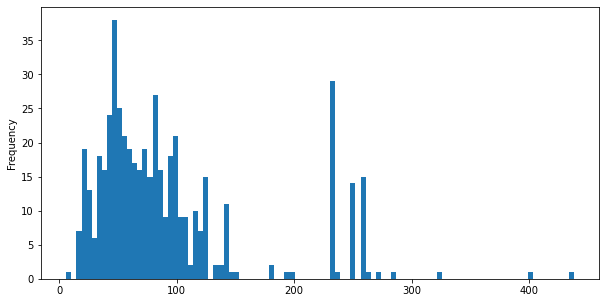

In [33]:
Housing_filtered['project_total_units'].plot.hist(figsize=(10,5),bins=100)

In [34]:
Housing_filtered_date = Housing_filtered['date_funded'].value_counts().reset_index()
Housing_filtered_date

,index,date_funded
0,2006-04-01T00:00:00,20
1,2005-05-02T00:00:00,15
2,2005-12-28T00:00:00,14
3,2006-07-31T00:00:00,9
4,2007-07-01T00:00:00,8
...,...,...
309,2020-08-07T00:00:00,1
310,2018-12-13T00:00:00,1
311,2006-05-30T00:00:00,1
312,2005-02-03T00:00:00,1


In [35]:
# rename columns
Housing_filtered_date = Housing_filtered_date.rename(columns={'index':'date','date_funded':'count'})
Housing_filtered_date

,date,count
0,2006-04-01T00:00:00,20
1,2005-05-02T00:00:00,15
2,2005-12-28T00:00:00,14
3,2006-07-31T00:00:00,9
4,2007-07-01T00:00:00,8
...,...,...
309,2020-08-07T00:00:00,1
310,2018-12-13T00:00:00,1
311,2006-05-30T00:00:00,1
312,2005-02-03T00:00:00,1


In [36]:
# sort by year
Housing_filtered_date = Housing_filtered_date.sort_values(by='date')

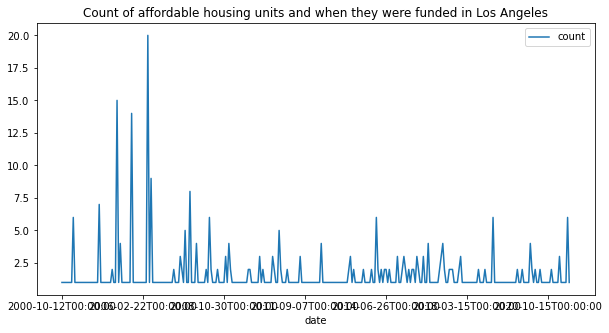

In [37]:
# plot it
Housing_filtered_date.plot(figsize=(10,5), x='date', title='Count of affordable housing units and when they were funded in Los Angeles')

make an affordable housing type chart

In [38]:
Housing_filtered.housing_type.value_counts()

FAMILY                            239
SPECIAL NEEDS                     135
SENIORS                            91
LARGE FAMILY / WAIVER REQUIRED     23
N/A                                12
AT-RISK                             2
SRO                                 1
Name: housing_type, dtype: int64

create a new variable of unit counts and put it in a dataframe

In [39]:
Housing_filtered_unit_counts = Housing_filtered.housing_type.value_counts().reset_index()
Housing_filtered_unit_counts

,index,housing_type
0,FAMILY,239
1,SPECIAL NEEDS,135
2,SENIORS,91
3,LARGE FAMILY / WAIVER REQUIRED,23
4,N/A,12
5,AT-RISK,2
6,SRO,1


horizontal bar chart: unit counts by affordable housing type 

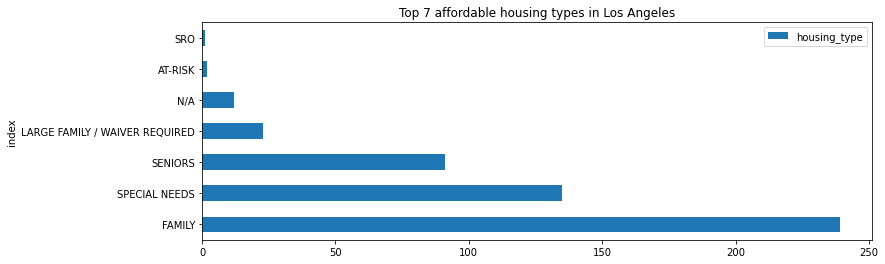

In [40]:
Housing_filtered_unit_counts[-7:].plot.barh(figsize=(12,4),
                                      x='index',
                                      y='housing_type',
                                      title="Top 7 affordable housing types in Los Angeles")

create variable for development stages

In [41]:
Housing_filtered_development_counts = Housing_filtered.development_stage.value_counts().reset_index()
Housing_filtered_development_counts

,index,development_stage
0,In-Service,422
1,Development,81


data frame types

In [42]:
Housing_filtered.plot

<bound method GeoDataFrame.plot of               community development_stage  project_total_units  \
0               CENTRAL        In-Service                  251   
1    CENTURY PALMS/COVE        In-Service                  232   
2             HOLLYWOOD        In-Service                   16   
3       UNIVERSITY PARK        In-Service                  125   
4             KOREATOWN        In-Service                   16   
..                  ...               ...                  ...   
498       VICTORIA PARK       Development                   54   
499                NULL       Development                   68   
500          SILVERLAKE        In-Service                   65   
501         WEST VERNON        In-Service                   32   
502            WESTLAKE        In-Service                   21   

             date_funded                    housing_type  \
0    2005-12-28T00:00:00                          FAMILY   
1    2006-04-01T00:00:00                          FA

plot by housing type

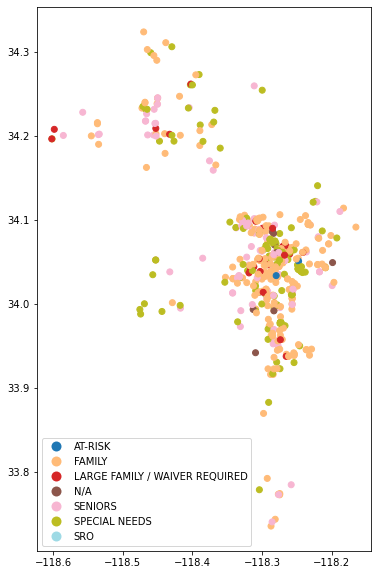

In [43]:
Housing_filtered.plot(figsize=(10,10),
         column='housing_type',
         cmap='tab20',
         legend=True)

reproject to web mercator

In [44]:
Housing_web_mercator = Housing.to_crs(epsg=3857)

set up the plot

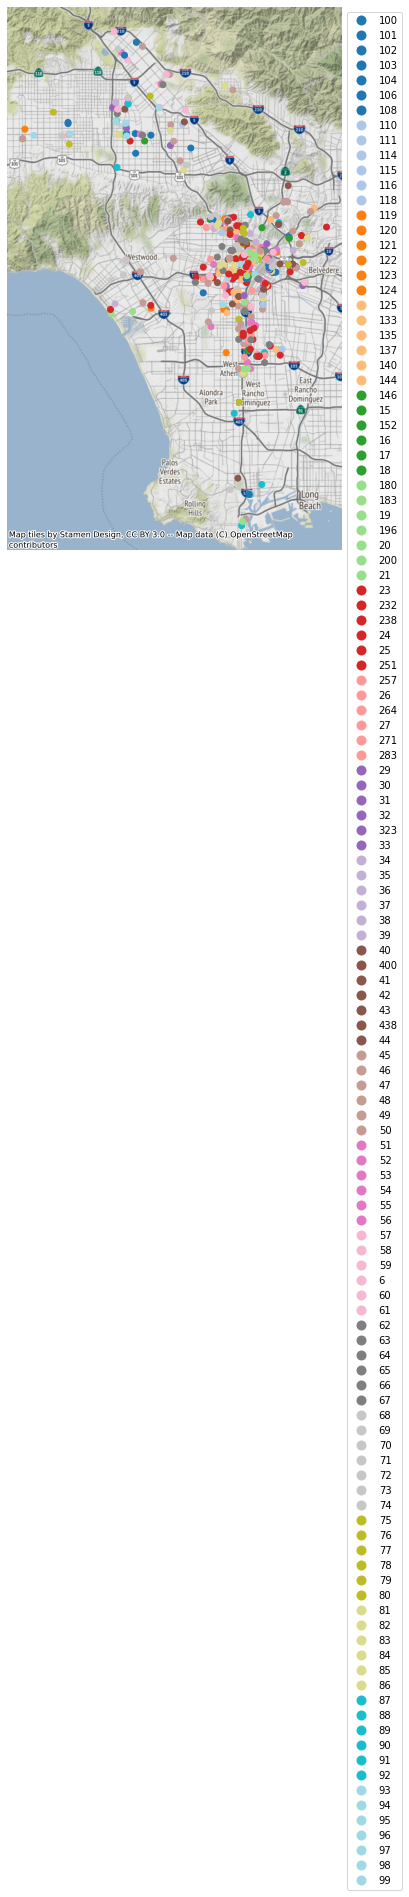

In [45]:
fig, ax = plt.subplots(figsize=(10,10))

# add layer
Housing_web_mercator.plot(ax=ax,
                        column='project_total_units',
                        cmap='tab20',
                        legend=True,
                        legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

# no axis
ax.axis('off')

# basemap 
ctx.add_basemap(ax)

It seems like there are some issues with the dataset that we need to work out before the final in order to get some of the answers we are looking for (as outlined in the description at the beginning.